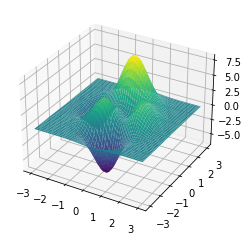

In [40]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib inline


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()

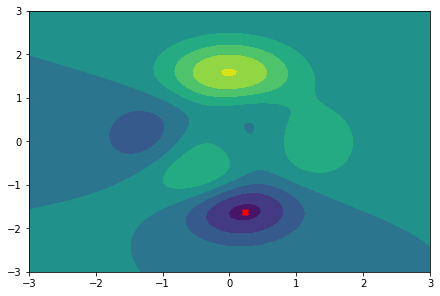

In [41]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

In [42]:
def validate(question,bool_fxn=lambda i,args:i=='y' or i=='n',cast=[str],error_message="Please enter valid input.",*args):
    if not isinstance(cast,tuple):
        cast = [cast]
    ans = input(question + "\n")
    while not bool_fxn(ans, args):
        ans = input(error_message + "\n")
    for i in np.arange(len(cast)):
        try:
            return cast[i](ans)
        except ValueError:
            pass

def check_decimal(lr,*args):
    try:
        int(lr)
        return True
    except ValueError:
        pass
    try:
        float(lr)
        return True
    except ValueError:
        pass
    return False

def check_posint(n,*args):
    try:
        return int(n) > 0
    except ValueError:
        return False


eta = validate("Learning rate?",check_decimal,float)
MAX_ITER = 'inf'
BOUND = 0
while MAX_ITER == "inf" and BOUND == 0:
    print("maxiter cannot be inf with 0 bound")
    MAX_ITER = validate("max iterations or 'inf' for unbounded?",lambda n,args:check_posint(n) or n == "inf",(int,str))
    BOUND = validate("gradient bound for stopping (can be 0 if maxiter is bounded)?",lambda n,args:check_decimal(n) and float(n) >= 0,float)
NUMVARS = 2
n = validate("How many points?",check_posint,int)
steps = np.empty((n,NUMVARS,MAX_ITER))
for i in np.arange(n):
    steps[i,:,0] = np.asarray([np.random.uniform(-3,3),np.random.uniform(-3,3)])

Learning rate?
.05
maxiter cannot be inf with 0 bound
max iterations or 'inf' for unbounded?
100
gradient bound for stopping (can be 0 if maxiter is bounded)?
.0001
How many points?
5


In [43]:
import numdifftools as nd


def gradient(x):
    return 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2)\
        - 10*(np.true_divide(x[0],5) - x[0]**3 - x[1]**5)*np.exp(-x[0]**2 - x[1]**2)\
        - np.true_divide(1,3)*np.exp(-(x[0]+1)**2 - x[1]**2)

In [44]:
def normsquared(x):
    return np.inner(x,x)

g = nd.Gradient(gradient)
for i in np.arange(n):
    j = 1
    grad = g(steps[i,:,0])
    while (MAX_ITER == "inf" or j < MAX_ITER) and normsquared(grad) > BOUND:
        steps[i,:,j] = steps[i,:,j - 1] - eta * grad
        grad = g(steps[i,:,j])
        j += 1

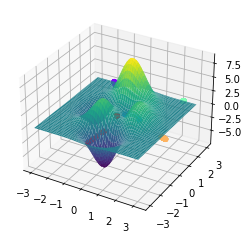

In [45]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
color = cm.rainbow(np.linspace(0,1,n))
for i,c in zip(np.arange(n),color):
    ax.scatter(steps[i,0,:],steps[i,1,:],0,color=c)
plt.show()

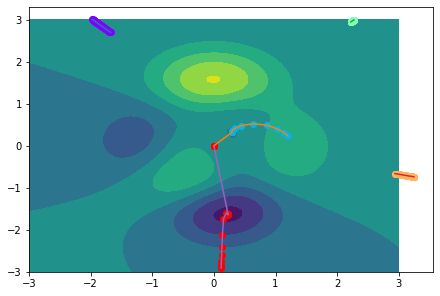

In [46]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
color = cm.rainbow(np.linspace(0,1,n))
for i,c in zip(np.arange(n),color):
    ax.scatter(steps[i,0,:],steps[i,1,:],color=c)
    plt.plot(steps[i,0,:],steps[i,1,:])
plt.show()

In [27]:
for i in steps:
    print(i[:,0])

[-1.72830498 -2.08054665]
[ 0.7916317  -2.99893673]
[-0.56413758  0.73197067]
[2.24750413 1.22624037]
[0.65649809 2.42367444]


In [28]:
print(steps[1,:,len(steps) - 1])

[ 0.72909903 -2.82078204]


In [37]:
m = steps[1,1,0]
c = 1
for i in np.arange(len(steps[1][0])):
    m = max(m,steps[1,1,i])
    if steps
    c+=1
#     print(steps[1,1,i])
print(m)

1.0


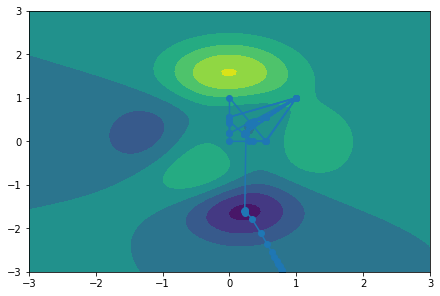

In [39]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.scatter(steps[1,0,:],steps[1,1,:])
plt.plot(steps[1,0,:],steps[1,1,:])
plt.show()